In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as scp
import os
import glob

In [2]:
df = pd.read_csv('virtualInternshipData_ADS2001_utf8.csv')
df = df.drop('Unnamed: 0', axis = 1)
df

,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
0,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5
1,1,a,2,PRNLT,I'm Maria Williams. I'll be your design adviso...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,11
2,1,a,3,PRNLT,I'm here to help if you have any questions.,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,9
3,1,a,4,PRNLT,Please introduce yourselves with the name you ...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,1,0,0,4,51
4,1,a,5,PRNLT,I just want to make sure everyone has found th...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19175,392,o,19179,PESPVP,yes,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,5,1
19176,388,o,19180,PESPVP,sounds good,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,8,2
19177,367,o,19181,PESPVP,"Well, we are out of time for our meeting.",6,Mentor,Reflection team discussion of first batch results,0,0,0,0,0,0,4,9
19178,393,o,19182,PESPVP,Precisely,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,4,1


In [3]:
df['userIDs'] = df['userIDs'].astype(str)
df['Line_ID'] = df['Line_ID'].astype(str)
df['group_id'] = df['group_id'].astype(str)
df['unique_id'] = df['group_id'] + df['implementation'] 
df = df[['unique_id', 'userIDs', 'implementation', 'Line_ID', 'ChatGroup', 'content', 'group_id', 'RoleName', 'roomName', 'm_experimental_testing', 'm_making_design_choices', 'm_asking_questions', 'j_customer_consultants_requests', 'j_performance_parameters_requirements', 'j_communication', 'OutcomeScore', 'wordCount']]

In [4]:
df

,unique_id,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
0,2a,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5
1,2a,1,a,2,PRNLT,I'm Maria Williams. I'll be your design adviso...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,11
2,2a,1,a,3,PRNLT,I'm here to help if you have any questions.,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,9
3,2a,1,a,4,PRNLT,Please introduce yourselves with the name you ...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,1,0,0,4,51
4,2a,1,a,5,PRNLT,I just want to make sure everyone has found th...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19175,6o,392,o,19179,PESPVP,yes,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,5,1
19176,6o,388,o,19180,PESPVP,sounds good,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,8,2
19177,6o,367,o,19181,PESPVP,"Well, we are out of time for our meeting.",6,Mentor,Reflection team discussion of first batch results,0,0,0,0,0,0,4,9
19178,6o,393,o,19182,PESPVP,Precisely,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,4,1


### Checking for missing values

In [5]:
df.isna().sum() # check for missing values

unique_id                                0
userIDs                                  0
implementation                           0
Line_ID                                  0
ChatGroup                                0
content                                  0
group_id                                 0
RoleName                                 3
roomName                                 0
m_experimental_testing                   0
m_making_design_choices                  0
m_asking_questions                       0
j_customer_consultants_requests          0
j_performance_parameters_requirements    0
j_communication                          0
OutcomeScore                             0
wordCount                                0
dtype: int64

In [6]:
df = df.dropna() # dropping rows with missing values as it only makes up for 3/19180 rows

In [7]:
df.isna().sum()

unique_id                                0
userIDs                                  0
implementation                           0
Line_ID                                  0
ChatGroup                                0
content                                  0
group_id                                 0
RoleName                                 0
roomName                                 0
m_experimental_testing                   0
m_making_design_choices                  0
m_asking_questions                       0
j_customer_consultants_requests          0
j_performance_parameters_requirements    0
j_communication                          0
OutcomeScore                             0
wordCount                                0
dtype: int64

# Data analysis

In [8]:
# data frame for each chat topic
# includes messages which have a combination of topics
# explore relationship between number of messages per topic to score
experimental_testing = df[df['m_experimental_testing'] == 1]
design_choices = df[df['m_making_design_choices'] == 1]  
asking_questions = df[df['m_asking_questions'] == 1]
customer_consultant_requests = df[df['j_customer_consultants_requests'] == 1]
performance_parameters_requirements = df[df['j_performance_parameters_requirements'] == 1]

### Data shape

In [9]:
df.shape

(19177, 17)

### Number of groups

In [10]:
df['group_id'].unique()

array(['2', '3', '4', '5', '6'], dtype=object)

### Number of participants

In [11]:
len(df['userIDs'].unique())

392

### Number of mentors

In [12]:
mentors_only = df[df['RoleName'] == 'Mentor']
print(f"There are {len(mentors_only['userIDs'].unique())} mentors")
mentors_only['userIDs'].unique()

There are 23 mentors


array(['1', '22', '37', '52', '63', '90', '107', '117', '134', '144',
       '150', '173', '201', '227', '254', '278', '301', '328', '333',
       '338', '343', '349', '367'], dtype=object)

### Creating student only dataframe

In [13]:
students_only = df[df['RoleName'] == 'Player']

In [14]:
students_only

,unique_id,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
5,2a,2,a,6,PRNLT,Hello I am Brandon!,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,4
6,2a,3,a,7,PRNLT,I am Zelin,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,3
7,2a,3,a,8,PRNLT,Hi,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,1
8,2a,4,a,9,PRNLT,i am jack,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,3
9,2a,5,a,10,PRNLT,Hey! I'm Rachel!,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19173,6o,391,o,19177,PESPVP,exactly!,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,5,1
19174,6o,389,o,19178,PESPVP,sounds good,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,7,2
19175,6o,392,o,19179,PESPVP,yes,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,5,1
19176,6o,388,o,19180,PESPVP,sounds good,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,8,2


### Create data frame for each group

In [15]:
group_2 = students_only[students_only['group_id'] == '2']
group_3 = students_only[students_only['group_id'] == '3']
group_4 = students_only[students_only['group_id'] == '4']
group_5 = students_only[students_only['group_id'] == '5']
group_6 = students_only[students_only['group_id'] == '6']

In [16]:
print(f"There are {len(group_2['userIDs'].unique())} students in group 2")
print(f"There are {len(group_3['userIDs'].unique())} students in group 3")
print(f"There are {len(group_4['userIDs'].unique())} students in group 4")
print(f"There are {len(group_5['userIDs'].unique())} students in group 5")
print(f"There are {len(group_6['userIDs'].unique())} students in group 6")


There are 78 students in group 2
There are 73 students in group 3
There are 75 students in group 4
There are 72 students in group 5
There are 71 students in group 6


### Average score of each group

In [17]:
average_scores = pd.DataFrame()
average_scores['group'] = students_only['unique_id'].unique()

outcome_scores = students_only.groupby('unique_id')['OutcomeScore'].mean().reset_index()

average_scores = average_scores.merge(outcome_scores, how='left', left_on='group', right_on='unique_id')

In [18]:
average_scores = average_scores.drop(columns = ['unique_id'])
average_scores

,group,OutcomeScore
0,2a,3.598662
1,3a,3.641176
2,4a,2.291971
3,5a,2.682292
4,6a,2.325843
...,...,...
70,2o,2.254286
71,3o,4.068259
72,4o,4.860000
73,5o,4.556213


### Table of scores of students

In [19]:
student_scores = pd.DataFrame()
student_scores['student'] = students_only['userIDs'].unique()

outcome_scores = students_only.groupby('userIDs')['OutcomeScore'].mean().reset_index()

student_scores = student_scores.merge(outcome_scores, how = 'left', left_on = 'student', right_on = 'userIDs')
student_scores

,student,userIDs,OutcomeScore
0,2,2,4.0
1,3,3,4.0
2,4,4,4.0
3,5,5,2.0
4,6,6,2.0
...,...,...,...
364,389,389,7.0
365,390,390,4.0
366,391,391,5.0
367,392,392,5.0


# Current Data frames we have
1. students_only - data frame with only student data
2. mentors_only - data frame with only mentor data
3. experimental_testing 
4. design_choices 
5. asking_questions
6. customer_consultant_requests 
7. performance_parameters_requirements 

# Creating GROUP LEVEL DATA (USE THIS FOR ANALYSIS)

In [20]:
group_level_data = students_only.groupby('unique_id').agg(
mean_outcome_score = ('OutcomeScore', 'mean'),
median_outcome_score = ("OutcomeScore", 'median'),
grp_total_experimental_testing = ("m_experimental_testing", 'sum'),
grp_total_making_design_choices = ("m_making_design_choices", 'sum'),
grp_total_asking_questions = ("m_asking_questions", 'sum'),
grp_total_customer_consultants_requests = ("j_customer_consultants_requests", 'sum'),
grp_total_performance_parameters_requirements = ("j_performance_parameters_requirements", 'sum'))
group_level_data['total_messages'] = group_level_data['grp_total_experimental_testing'] + group_level_data['grp_total_making_design_choices'] +group_level_data['grp_total_asking_questions'] +group_level_data['grp_total_customer_consultants_requests'] + group_level_data['grp_total_performance_parameters_requirements']

group_score_range = students_only.groupby('unique_id')['OutcomeScore'].apply(lambda x: x.max() - x.min())
group_level_data['score_range'] = group_level_data.index.map(group_score_range)

In [21]:
mentor_interactions = mentors_only.groupby('unique_id').agg(average_experimental_testing = ("m_experimental_testing", 'sum'),
    average_making_design_choices = ("m_making_design_choices", 'sum'),
    average_asking_questions = ("m_asking_questions", 'sum'),
    average_customer_consultants_requests = ("j_customer_consultants_requests", 'sum'),
    average_performance_parameters_requirements = ("j_performance_parameters_requirements", 'sum'))
mentor_interactions['total_mentor_interactions'] = mentor_interactions['average_experimental_testing'] + mentor_interactions['average_making_design_choices'] + mentor_interactions['average_asking_questions'] + mentor_interactions['average_customer_consultants_requests'] + mentor_interactions['average_performance_parameters_requirements']

In [22]:
group_level_data['total_mentor_interactions'] = mentor_interactions['total_mentor_interactions']
group_level_data['grp_score_range'] = group_level_data['mean_outcome_score']
group_level_data.fillna(group_level_data.mean(), inplace = True)

group_level_data

,mean_outcome_score,median_outcome_score,grp_total_experimental_testing,grp_total_making_design_choices,grp_total_asking_questions,grp_total_customer_consultants_requests,grp_total_performance_parameters_requirements,total_messages,score_range,total_mentor_interactions,grp_score_range
unique_id,,,,,,,,,,,
2a,3.598662,4.0,10,21,54,2,21,108,3,23.0,3.598662
2b,3.067669,4.0,2,25,21,4,9,61,4,21.0,3.067669
2c,3.341357,4.0,8,32,99,8,27,174,4,18.0,3.341357
2d,3.737452,4.0,6,29,40,4,8,87,4,15.0,3.737452
2e,3.617834,2.0,1,6,29,3,6,45,7,11.0,3.617834
...,...,...,...,...,...,...,...,...,...,...,...
6k,3.822581,4.0,2,19,22,3,7,53,6,1.0,3.822581
6l,3.221757,4.0,3,12,30,0,7,52,4,14.0,3.221757
6m,4.151515,4.0,9,23,48,4,8,92,4,15.0,4.151515


# Creating STUDENT LEVEL DATA (USE THIS FOR ANALYSIS)

In [23]:
groups = students_only.groupby('userIDs')['unique_id'].first().reset_index()
groups = students_only.groupby('userIDs')['unique_id'].agg(lambda x: ','.join(set(x))).reset_index()

groups

,userIDs,unique_id
0,10,3a
1,100,3d
2,101,4d
3,102,4d
4,103,4d
...,...,...
364,95,2d
365,96,3d
366,97,3d
367,98,3d


In [24]:
student_level_data = students_only.groupby('userIDs').agg(
outcome_score = ('OutcomeScore', 'mean'),
total_experimental_testing = ("m_experimental_testing", 'sum'),
total_making_design_choices = ("m_making_design_choices", 'sum'),
total_asking_questions = ("m_asking_questions", 'sum'),
total_customer_consultants_requests = ("j_customer_consultants_requests", 'sum'),
total_performance_parameters_requirements = ("j_performance_parameters_requirements", 'sum'))

student_level_data = student_level_data.merge(groups, how = 'left', left_on = 'userIDs', right_on = 'userIDs')

student_level_data.set_index('userIDs', inplace = True)
student_level_data.index = student_level_data.index.astype(int)
student_level_data = student_level_data.sort_index()
student_level_data['total_messages'] = student_level_data['total_experimental_testing'] + student_level_data['total_making_design_choices'] +student_level_data['total_asking_questions'] +student_level_data['total_customer_consultants_requests'] + student_level_data['total_performance_parameters_requirements']
student_level_data
merged_data = pd.merge(student_level_data, group_level_data, on='unique_id', how='left')

merged_data = merged_data.drop(columns = merged_data[['mean_outcome_score', 'median_outcome_score', 'score_range']])
merged_data.rename(columns={'total_messages_y': 'total_grp_messages', 'total_messages_x': 'total_indiv_messages'}, inplace=True)
merged_data = merged_data.drop(columns = merged_data[['total_experimental_testing', 'total_making_design_choices', 'total_asking_questions', 'total_customer_consultants_requests', 'total_performance_parameters_requirements', 'total_indiv_messages', 'grp_score_range']])

merged_data.index.name = 'userIDs'
merged_data

,outcome_score,unique_id,grp_total_experimental_testing,grp_total_making_design_choices,grp_total_asking_questions,grp_total_customer_consultants_requests,grp_total_performance_parameters_requirements,total_grp_messages,total_mentor_interactions
userIDs,,,,,,,,,
0,4.0,2a,10,21,54,2,21,108,23.0
1,4.0,2a,10,21,54,2,21,108,23.0
2,4.0,2a,10,21,54,2,21,108,23.0
3,2.0,2a,10,21,54,2,21,108,23.0
4,2.0,2a,10,21,54,2,21,108,23.0
...,...,...,...,...,...,...,...,...,...
364,7.0,6o,16,28,36,5,29,114,20.0
365,4.0,6o,16,28,36,5,29,114,20.0
366,5.0,6o,16,28,36,5,29,114,20.0


## Heatmaps

#### Average Number of questions for each OutcomeScore (0-8)

In [25]:
score_averages = students_only.groupby('OutcomeScore').agg(
    average_experimental_testing = ("m_experimental_testing", 'mean'),
    average_making_design_choices = ("m_making_design_choices", 'mean'),
    average_asking_questions = ("m_asking_questions", 'mean'),
    average_customer_consultants_requests = ("j_customer_consultants_requests", 'mean'),
    average_performance_parameters_requirements = ("j_performance_parameters_requirements", 'mean'))

# EDA

### Student level: Pairplot for continuous variables

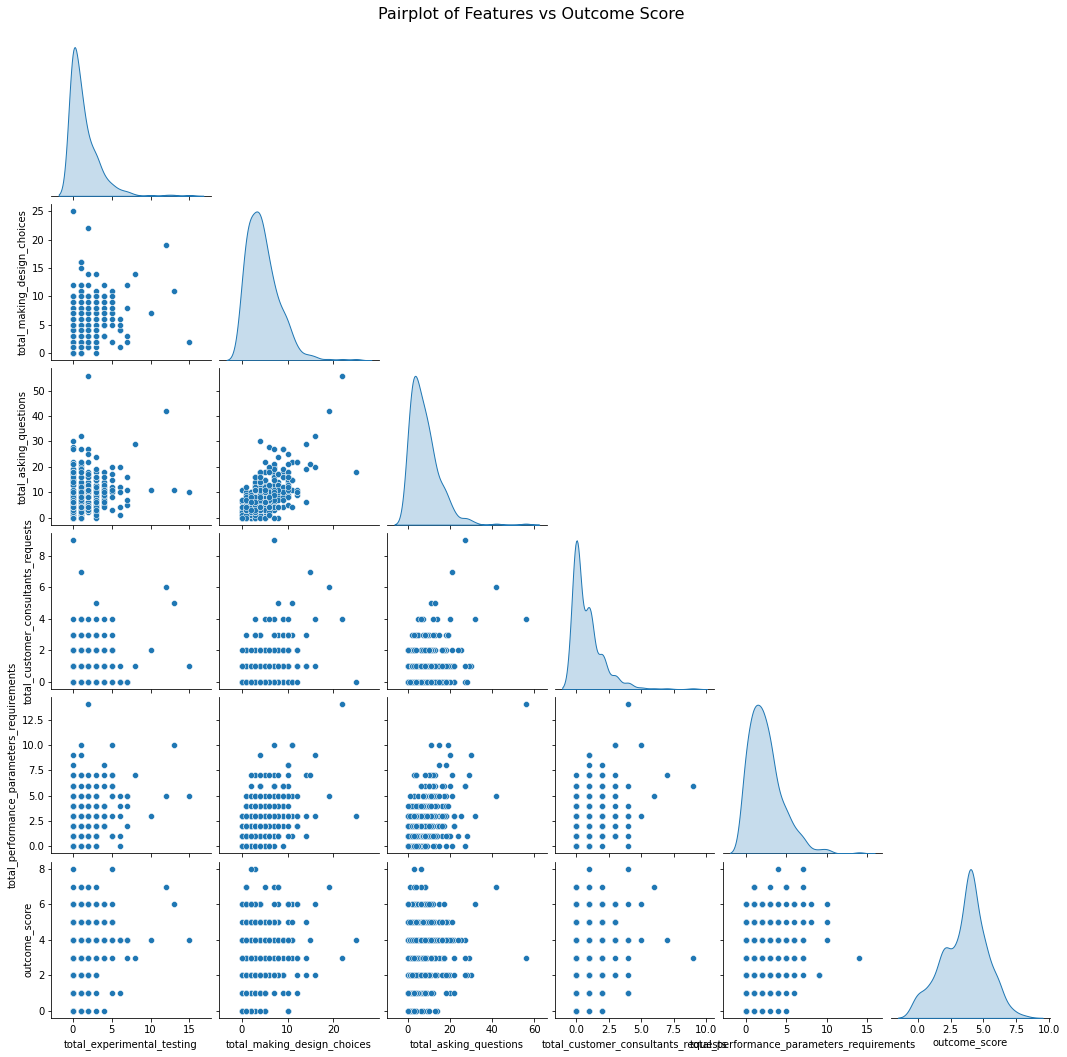

In [26]:
features = ['total_experimental_testing', 'total_making_design_choices', 
            'total_asking_questions', 'total_customer_consultants_requests',
            'total_performance_parameters_requirements', 'outcome_score']

# Create pairplot
sns.pairplot(student_level_data[features], diag_kind='kde', markers='o', corner = True)

# Adjust layout
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairplot of Features vs Outcome Score', fontsize=16)

# Show plot
plt.show()

### Student level: Outcome score vs Number of messages relating to a topic

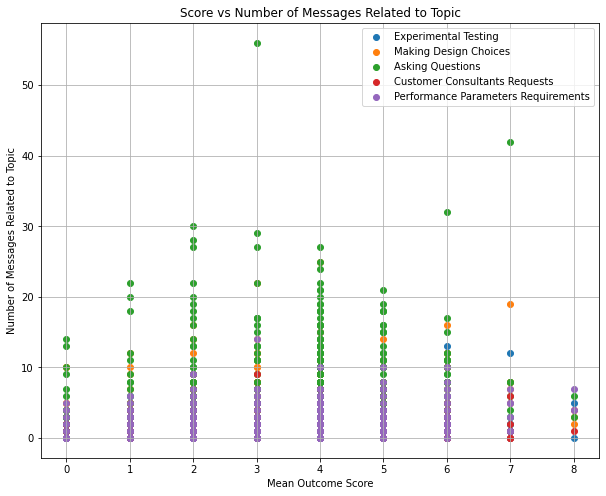

In [27]:
scores = student_level_data['outcome_score']
experimental_testing_messages = student_level_data['total_experimental_testing']
making_design_choices_messages = student_level_data['total_making_design_choices']
asking_questions_messages = student_level_data['total_asking_questions']
customer_consultants_requests_messages = student_level_data['total_customer_consultants_requests']
performance_parameters_requirements_messages = student_level_data['total_performance_parameters_requirements']


plt.figure(figsize=(10, 8)) 

plt.scatter(scores, experimental_testing_messages, label='Experimental Testing')
plt.scatter(scores, making_design_choices_messages, label='Making Design Choices')
plt.scatter(scores, asking_questions_messages, label='Asking Questions')
plt.scatter(scores, customer_consultants_requests_messages, label='Customer Consultants Requests')
plt.scatter(scores, performance_parameters_requirements_messages, label='Performance Parameters Requirements')

plt.title('Score vs Number of Messages Related to Topic')
plt.xlabel('Mean Outcome Score')
plt.ylabel('Number of Messages Related to Topic')
plt.legend()
plt.grid(True) 
plt.show()

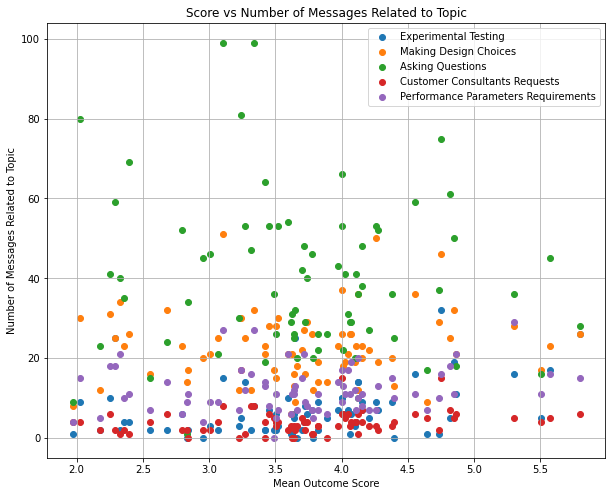

In [35]:
scores = group_level_data['mean_outcome_score']
experimental_testing_messages = group_level_data['grp_total_experimental_testing']
making_design_choices_messages = group_level_data['grp_total_making_design_choices']
asking_questions_messages = group_level_data['grp_total_asking_questions']
customer_consultants_requests_messages = group_level_data['grp_total_customer_consultants_requests']
performance_parameters_requirements_messages = group_level_data['grp_total_performance_parameters_requirements']


plt.figure(figsize=(10, 8)) 

plt.scatter(scores, experimental_testing_messages, label='Experimental Testing')
plt.scatter(scores, making_design_choices_messages, label='Making Design Choices')
plt.scatter(scores, asking_questions_messages, label='Asking Questions')
plt.scatter(scores, customer_consultants_requests_messages, label='Customer Consultants Requests')
plt.scatter(scores, performance_parameters_requirements_messages, label='Performance Parameters Requirements')

plt.title('Score vs Number of Messages Related to Topic')
plt.xlabel('Mean Outcome Score')
plt.ylabel('Number of Messages Related to Topic')
plt.legend()
plt.grid(True) 
plt.show()

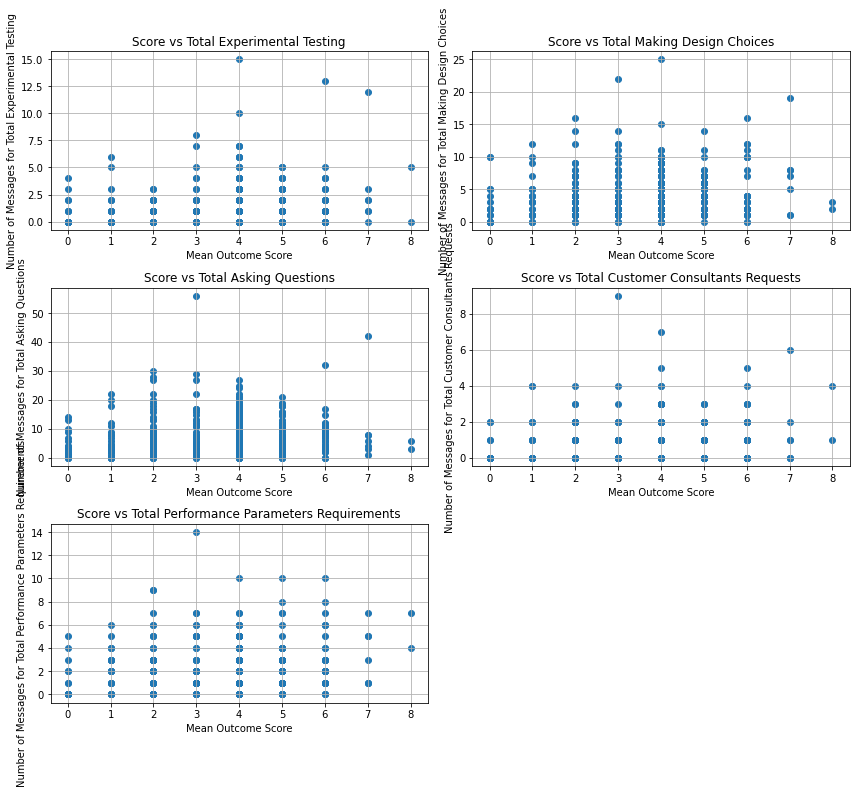

In [28]:
scores = student_level_data['outcome_score']
topics = ['total_experimental_testing', 'total_making_design_choices', 
          'total_asking_questions', 'total_customer_consultants_requests',
          'total_performance_parameters_requirements']

# Plotting the scatter plots for each topic
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

for i, topic in enumerate(topics, start=1):
    plt.subplot(3, 2, i)  # Create subplots
    plt.scatter(scores, student_level_data[topic])
    plt.title(f'Score vs {topic.replace("_", " ").title()}')
    plt.xlabel('Mean Outcome Score')
    plt.ylabel(f'Number of Messages for {topic.replace("_", " ").title()}')
    plt.grid(True) 

plt.tight_layout()  
plt.show()

## Heat map: Student level

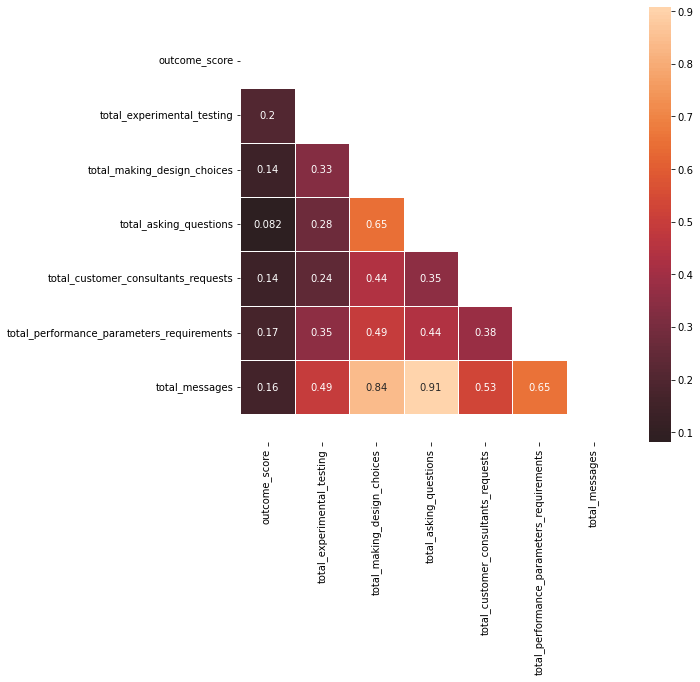

In [29]:
corrs = student_level_data.corr()
mask = np.triu(np.ones_like(corrs, dtype=bool)) 
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5)
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

## Heatmap: Group level

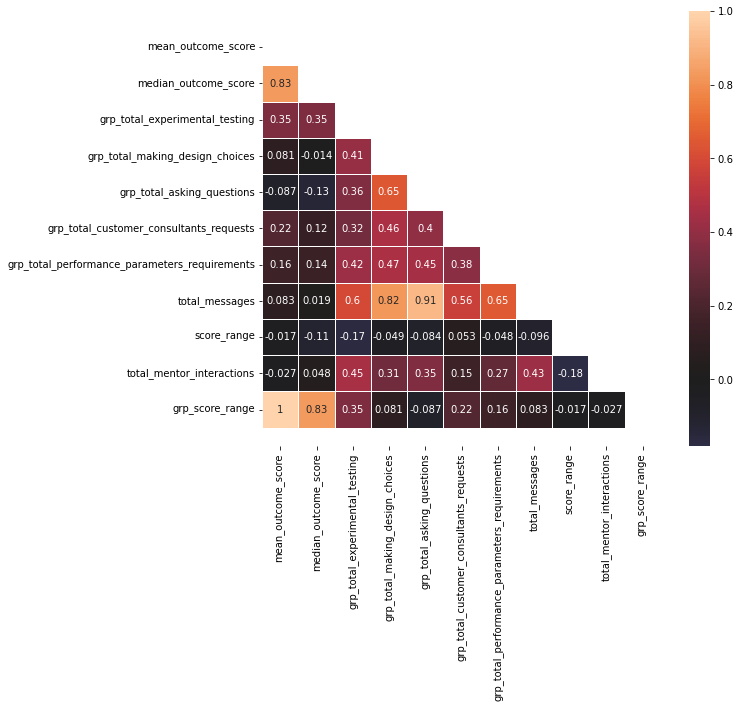

In [30]:
corrs = group_level_data.corr()
mask = np.triu(np.ones_like(corrs, dtype=bool)) 
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5)
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

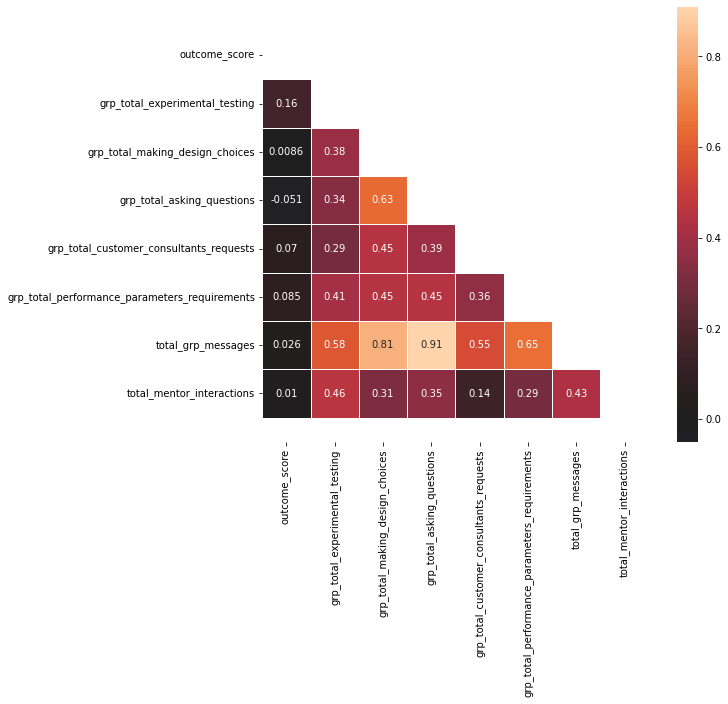

In [31]:
corrs = merged_data.corr()
mask = np.triu(np.ones_like(corrs, dtype=bool)) 
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5)
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

## Histograms

<AxesSubplot:xlabel='total_experimental_testing', ylabel='Count'>

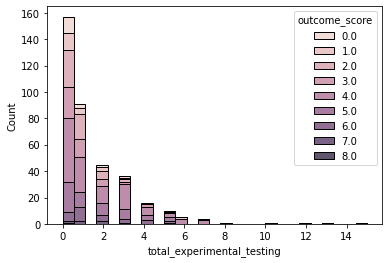

In [32]:
sns.histplot(x='total_experimental_testing', hue='outcome_score', data=student_level_data, multiple='stack')

/var/folders/m4/s3xj9xf96hbd8zvh6_dnr3wr0000gq/T/ipykernel_35771/2277811307.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout


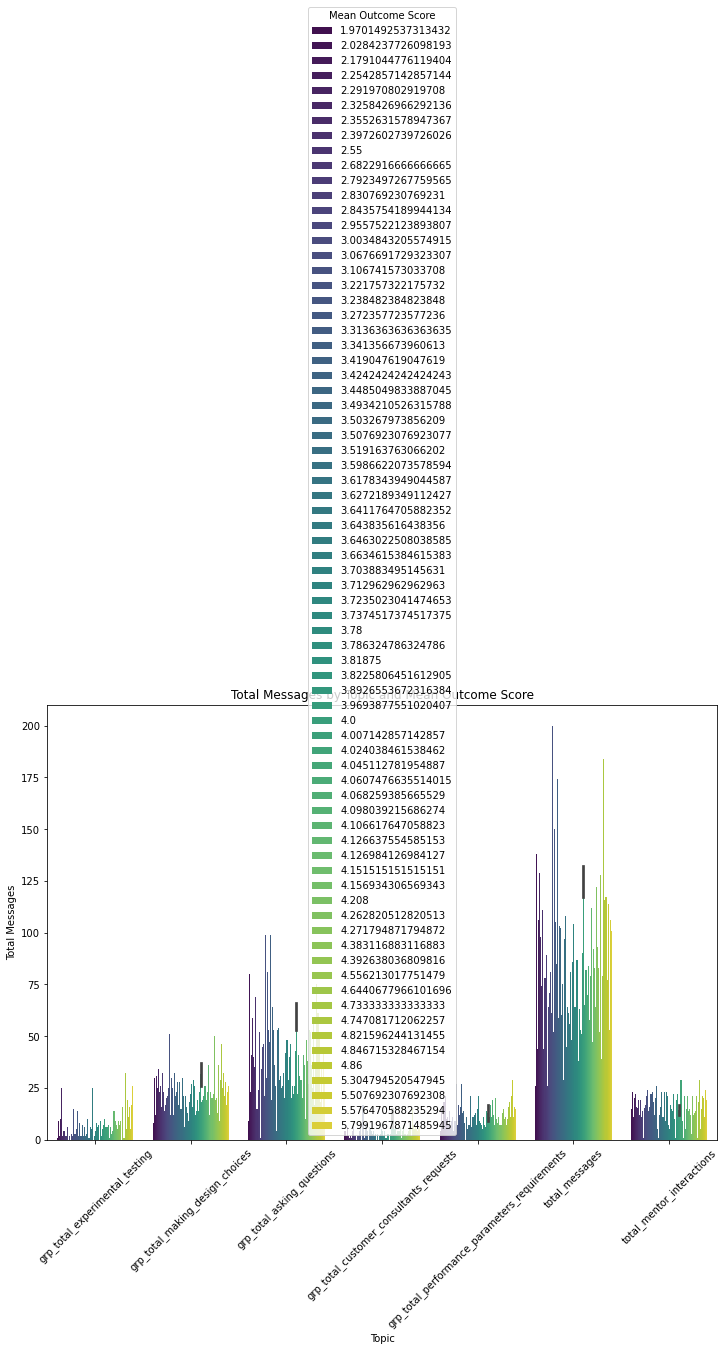

In [33]:
group_level_data_filtered = group_level_data.drop(columns=['median_outcome_score', 'score_range', 'grp_score_range'])
group_level_data_sorted = group_level_data_filtered.sort_values(by='mean_outcome_score', ascending=False)
# Set the figure size
plt.figure(figsize=(12, 8))

# Melt the DataFrame to reshape it for plotting
melted_data = group_level_data_filtered.melt(id_vars=['mean_outcome_score'], var_name='Topic', value_name='Total_Messages')

# Create the grouped bar plot
sns.barplot(x='Topic', y='Total_Messages', hue='mean_outcome_score', data=melted_data, palette='viridis')

# Add title and labels
plt.title('Total Messages by Topic and Mean Outcome Score')
plt.xlabel('Topic')
plt.ylabel('Total Messages')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Mean Outcome Score')  # Add legend
plt.tight_layout()  # Adjust layout
plt.show()


# Real modelling (predict student outcome via group data)

# Modelling student level

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from logitplots import plt_confusion_matrix, plt_decision_boundaries, plt_correlation_matrix

## Decision tree classification

In [217]:
X = student_level_data.drop('outcome_score', axis = 1) # create a dataframe of features, by dropping the target variable
y = student_level_data['outcome_score'] # create a dataframe of target values
# split the dataframes into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [218]:
# instantatiate the DTC, set random_state so results are repeatable
student_level_dtc = DecisionTreeClassifier(random_state = 42) 
student_level_dtc = student_level_dtc.fit(X_train, y_train) # train the model using the training set

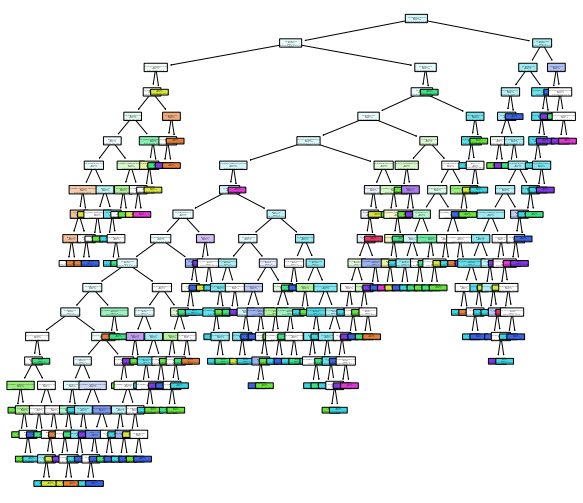

In [219]:
fig, ax = plt.subplots(figsize=(10,9)) # initialise the plots and axes
# plot the decision tree for the model df_dtc
plot_tree(student_level_dtc, 
 filled = True, # colour the nodes according to the classifaction
 rounded = True, # make the nodes have rounded corners
 class_names = ['0', '1','2', '3', '4', '5', '6', '7', '8'], # use these names for targets
 feature_names = X.columns # use these names for features
 );

Decision Tree Accuracy: 0.258


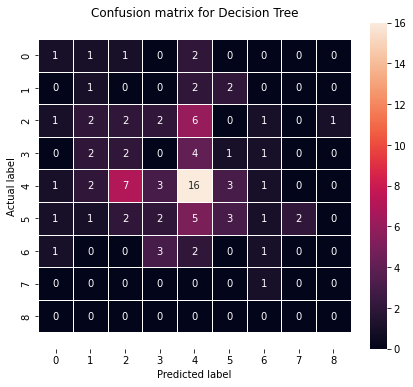

In [220]:
Y_pred = student_level_dtc.predict(X_test) # calculate the predictions of the model for our test set
# plot the confusion matrix for the test and predicted target values
cm = confusion_matrix(y_test, Y_pred)
plt_confusion_matrix(cm, ['0','1','2', '3', '4', '5', '6', '7', '8'], 'Decision Tree') 
print("Decision Tree Accuracy:",np.round(accuracy_score(y_test, Y_pred),3)) # calculate and print the accuracy score

## Logistic Regression

In [221]:
XX, Y = student_level_data[student_level_data.columns[1:6]], student_level_data.outcome_score
X = (XX-XX.mean())/XX.std()
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=0)  

In [222]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',penalty='none')
logreg.fit(X_train,y_train) # fit the training data to the model
print('Model coefficients are',np.round(logreg.coef_,3)) # print the model coefficients c1,...,c4
print('Model intercept is',np.round(logreg.intercept_,3)) # print the model intercept c0

Model coefficients are [[ 7.200e-02  7.730e-01  8.100e-02 -8.160e-01 -1.523e+00]
 [-1.290e-01  3.320e-01  2.690e-01 -1.800e-01 -2.480e-01]
 [-6.480e-01  9.110e-01  6.060e-01 -4.450e-01 -4.510e-01]
 [-3.000e-03  1.093e+00  5.400e-01 -6.860e-01 -5.410e-01]
 [ 2.670e-01  9.520e-01  5.360e-01 -4.980e-01 -5.070e-01]
 [ 4.500e-02  1.014e+00  4.140e-01 -4.780e-01 -5.250e-01]
 [ 3.080e-01  9.690e-01  2.780e-01 -1.240e-01 -3.570e-01]
 [-2.440e-01  5.780e-01 -4.150e-01 -4.250e-01  3.680e-01]
 [ 3.320e-01 -6.622e+00 -2.308e+00  3.651e+00  3.783e+00]]
Model intercept is [  0.784   1.444   2.284   2.16    3.147   2.366   1.739  -0.428 -13.495]


/Users/Aden/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [223]:
y_preda = logreg.predict_proba(X_test) # calculate the probabilities for the test features
# print out the probability table with a header
print('Probability table for testing set is:')
print(y_preda)

Probability table for testing set is:
[[3.09162433e-03 1.23243127e-01 1.90392964e-01 9.28237799e-02
  3.07629437e-01 1.34315689e-01 1.19531319e-01 2.78347837e-02
  1.13727562e-03]
 [7.72549723e-03 4.88267778e-02 1.25323255e-01 1.37404515e-01
  3.75606555e-01 1.67006800e-01 1.19583670e-01 1.85229241e-02
  6.47023904e-09]
 [1.77860672e-01 9.19275043e-02 1.83960602e-01 1.10897718e-01
  2.49386344e-01 1.33089759e-01 4.34254499e-02 9.45150285e-03
  4.48386511e-07]
 [3.10449357e-02 1.03690357e-01 2.43383544e-01 1.28130794e-01
  2.89913521e-01 1.38095083e-01 5.04056719e-02 1.53335079e-02
  2.58572864e-06]
 [2.30949100e-02 1.16250449e-01 1.55583297e-01 9.39936438e-02
  2.98149365e-01 1.56378850e-01 1.30229248e-01 2.62280196e-02
  9.22184028e-05]
 [1.77946264e-02 8.32037318e-02 8.24112413e-02 1.09809588e-01
  3.96271695e-01 1.56383918e-01 1.31446159e-01 2.26652363e-02
  1.38044527e-05]
 [2.81136616e-02 5.60071425e-02 2.38252151e-01 1.54915439e-01
  2.99904982e-01 1.55688837e-01 5.51132785e-02 1

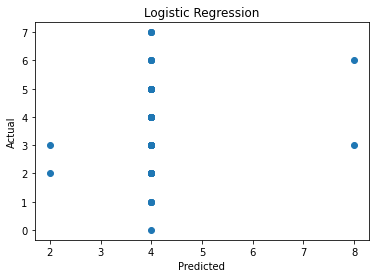

In [224]:
y_pred=logreg.predict(X_test) # calculate the predicted values of the model for the test features
plt.scatter(y_pred,y_test) # plot the predicted values against the actual test values
plt.xlabel('Predicted') # xlabel
plt.ylabel('Actual') # ylabel 
plt.title('Logistic Regression'); # add a title

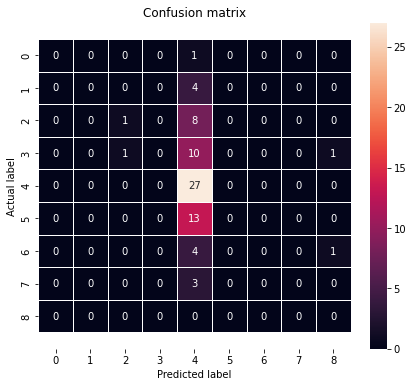

In [225]:
cnf_matrix = confusion_matrix(y_test, y_pred) # create a confusion matrix for our actual and predicted values
# create a data frame from the confusion matrix with the column and row names being the class_names
class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8'] # names of the binary classes for plotting
cmatrix = pd.DataFrame(cnf_matrix,columns=class_names,index=class_names) 
f, ax = plt.subplots(figsize=(7,6)) # initialise the plots and axes
sns.heatmap(cmatrix, annot=True, linewidths=.5) # plot the confusion matrix as a heatmap
plt.title('Confusion matrix') # add a title
plt.ylabel('Actual label') # add a ylabel
plt.xlabel('Predicted label') # add a xlabel
# adjust the bottom and top of the figure, so we can view all of it
bottom, top = ax.get_ylim()  # get the y axis limits
ax.set_ylim(bottom + 0.5, top - 0.5); # adjust the y axis limits

In [226]:
from sklearn.metrics import accuracy_score
print("Accuracy:",np.round(accuracy_score(y_test, y_pred),3)) # calculate and print the accuracy score

Accuracy: 0.378


# Try: Predicting student score based on group statistics

In [227]:
X = merged_data.drop(columns = ['outcome_score', 'total_experimental_testing', 'total_making_design_choices', 'total_asking_questions', 'total_customer_consultants_requests', 'total_performance_parameters_requirements', 'group_id', 'total_indiv_messages', 'grp_score_range'], axis = 1) # create a dataframe of features, by dropping the target variable
y = merged_data['outcome_score'] # create a dataframe of target values
# split the dataframes into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [228]:
# instantatiate the DTC, set random_state so results are repeatable
merged_dtc = DecisionTreeClassifier(random_state = 42) 
merged_dtc = student_level_dtc.fit(X_train, y_train) # train the model using the training set

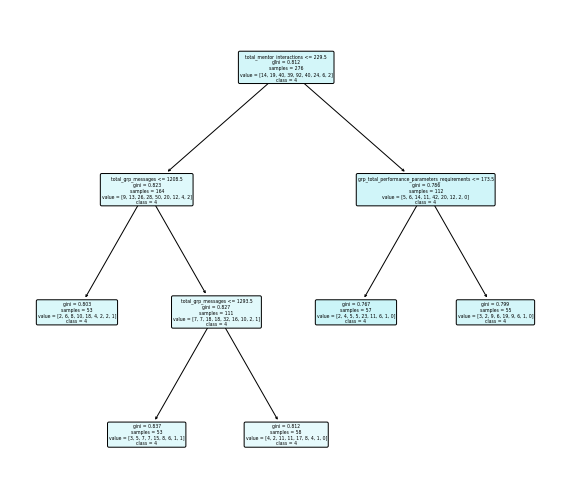

In [229]:
fig, ax = plt.subplots(figsize=(10,9)) # initialise the plots and axes
# plot the decision tree for the model df_dtc
plot_tree(merged_dtc, 
 filled = True, # colour the nodes according to the classifaction
 rounded = True, # make the nodes have rounded corners
 class_names = ['0', '1','2', '3', '4', '5', '6', '7', '8'], # use these names for targets
 feature_names = X.columns # use these names for features
 );

Decision Tree Accuracy: 0.355


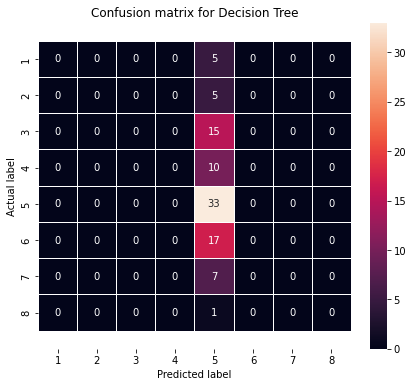

In [230]:
Y_pred = merged_dtc.predict(X_test) # calculate the predictions of the model for our test set
# plot the confusion matrix for the test and predicted target values
cm = confusion_matrix(y_test, Y_pred)
plt_confusion_matrix(cm, ['1','2', '3', '4', '5', '6', '7', '8'], 'Decision Tree') 
print("Decision Tree Accuracy:",np.round(accuracy_score(y_test, Y_pred),3)) # calculate and print the accuracy score

In [ ]:
X = merged_data.drop(columns = ['outcome_score', 'total_experimental_testing', 'total_making_design_choices', 'total_asking_questions', 'total_customer_consultants_requests', 'total_performance_parameters_requirements', 'group_id', 'total_indiv_messages', 'grp_score_range'], axis = 1) # create a dataframe of features, by dropping the target variable
y = merged_data['outcome_score'] # create a dataframe of target values
# split the dataframes into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [243]:
clf = RandomForestClassifier(n_estimators=200, max_samples=.5).fit(X_train, y_train)

Y_pred = clf.predict(X_test) # calculate the predicted values
accuracy = np.round(accuracy_score(y_test, Y_pred),3) # calculate the accuracy score
print(accuracy)

0.355


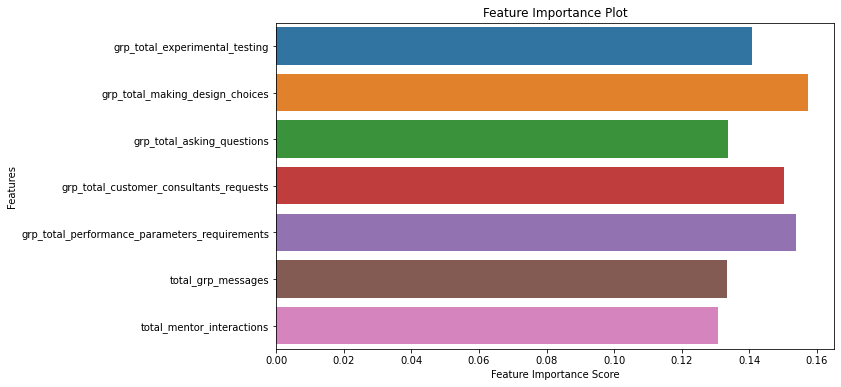

In [245]:
# Get feature importances
feature_importances = clf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()
